In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data =  pd.read_csv('Titanic_Dataset.csv')
data

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


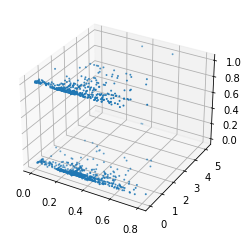

In [63]:
x1 = data['Age'].values/100
x1 = x1.astype(np.float64)
x2 = data['Fare'].values/100
x2 = x2.astype(np.float64)
y = data['Sex'].values
ax = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y , s=1)

In [40]:
def sigmoid_function(z):
    return (1/(1+np.exp(-z)))

In [23]:
def hypothesis(X, theta):
    return np.matmul(X, theta)

In [24]:
def cost_function(X, Y, theta):
    infunc = -Y*(np.log(sigmoid_function(hypothesis(X, theta)))) - (1-Y)*(np.log(1-sigmoid_function(hypothesis(X, theta))))
    return np.sum(infunc)/len(Y)

In [29]:
def gradient_decent_function(X, Y, alpha, iterations):
    theta = np.zeros(len(X[0]))
    m = len(Y)
    
    for _ in range(iterations):
        z = hypothesis(X, theta)
        s = sigmoid_function(z)
        t0 = theta[0] - (alpha/m) - np.sum((s-Y))
        t1 = theta[1] - (alpha/m) - np.sum((s-Y) * X[:,1])
        t2 = theta[2] - (alpha/m) - np.sum((s-Y) * X[:,2])
        theta =  np.array([t0 , t1, t2])
    return theta

In [71]:
iterations = 10000
alpha = 0.1
X = np.column_stack((np.ones(len(x1)), x1, x2))
Y = y
theta = gradient_decent_function(X, Y, alpha, iterations)
theta

<ipython-input-40-12bb3123a3e4>:2: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-z)))


array([-125.30321779, -627.9722427 ,  405.25215267])

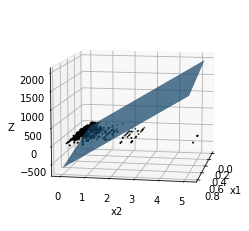

In [83]:
ax = plt.axes(projection = '3d')
ax.scatter3D(x1, x2, y , s=1, color='black')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Z')
samples1 = np.linspace(min(x1), max(x1))
samples2 = np.linspace(min(x2), max(x2))
samples11, samples22 = np.meshgrid(samples1,samples2)
Z = theta[0] + theta[1] * samples11 + theta[2] * samples22
ax.plot_surface(samples11, samples22, Z)
ax.view_init(10,10)